# **Table of Contents**

## **1. Business Understanding**

## **2. Data Understanding**

## **3. Data Preprocessing**

### **3.1 Import Library**

In [1]:
# Scraping data from twitter
# import snscrape
import snscrape.modules.twitter as sntwitter

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Text preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.classify import SklearnClassifier
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **3.2 Scrapping Data**

In [2]:
# # API
# api_key = "UcctOMgqRKStNA4qSUZ5AMQan"
# api_key_secret = "J9ScFPUN5dtovcuco31xZn0s0TB3oKLHUUop8kiu8W8QfueTTw"
# access_token = "2923944534-bV7LaWPsL5Blqtn7aLUQt3fbPCOvAz0oI9d9hbp"
# access_token_secret = "MA6MUgJc43m8XyjDdrmOMODQLoNx1rYEcFIP1aWfuA7CN"
# bearer_token = "AAAAAAAAAAAAAAAAAAAAAAKZmQEAAAAAe6G3iQXqblnt7I%2FQ6EU%2BR%2FtVd5Y%3Dah4BXNsdCZ90oQ9q4ui0J9m662PNiDzoWdO3ahodsvOxH2TUrM"
# client_id = "UXN1Q21ubjBxdHdYdmtpREdoYmM6MTpjaQ"
# client_secret = "BGuZcFso-C6XlG0Y4ffKI5jrTBGQaJ4RA_NX_47Y8HLMWG-88N"

In [3]:
# # Scrapping data from twitter with SNScrape
# scraper = sntwitter.TwitterSearchScraper('kemenkeu lang:id -filter:links')

# # Get the data
# tweet_df = []
# for i,tweet in enumerate(scraper.get_items()):
#     data = [
#         tweet.id,
#         tweet.user.username,
#         tweet.content,
#         tweet.date
#     ]

#     tweet_df.append(data)
#     if i > 2000:
#         break
    
# # Create dataframe
# tweet_df = pd.DataFrame(tweet_df, columns=['id', 'username', 'content', 'date'])
# tweet_df.head()

In [4]:
# # Save to csv
# import os.path
# tweet_df.to_csv(os.path.join('E:\KAMPUS\BERKAS - BERKAS\Skripsi\Dataset', 'tweet_df_kemenkeu.csv'), index=False)

### **3.3 Data Review & Cleaning**

#### **3.3.1 Data Review**

In [5]:
# Import dataset
df = pd.read_csv(r"E:\KAMPUS\BERKAS - BERKAS\Skripsi\Dataset\tweet_df_kemenkeu.csv")

In [6]:
# Shape of the data
print("Shape of the data: ", df.shape)

Shape of the data:  (2002, 4)


In [7]:
# Print the first 5 rows and show all content
pd.set_option('display.max_colwidth', None)

# # Show 5 random rows
df.sample(5)

# df.head()

,id,username,content,date
80,1643229023856902147,shiyaaap,@bagiwang @gfuzuli @eselon_musk @PNS_Ababil Yg 27 selain kemenkeu apa aja?,2023-04-04 12:28:23+00:00
733,1642319588481458176,sulaimanariefst,"@jokowi Harusnya 200jt cukup bisa buat bahagia kan ? Drpd kalau tanding terus kalah dan gak dpt apa apa ? Ini hasil terbaik, apalagi ditawari ditawari jd ASN pajak, bea cukai, kemenkeu dan polisi, inilah jalan kekayaan yg hakiki !!",2023-04-02 00:14:37+00:00
813,1642238063366787072,GintingDudi,"@giginpraginanto Mungkinkah @DitjenPajakRI @beacukaiRI @pertamina atau dana CSR perusahaan milik @KemenBUMN jd ATM para pencuri sehingga duit negara sll dlm keadaan darurat? Klo @kemenkeu ngundang artis utk nyanyi, apa iya klo duit negara sdg darurat? rakyat sll jd sasaran penyiksaan utk dpt duit",2023-04-01 18:50:40+00:00
1635,1641630304090861569,Umbisabar,@Jenengsinggawe @HermesWijaya @Dany35160046 @PNS_Garis_Lucu Sewot bgt ya tuhan. Apa jangan2 lu yg iri? Alumni stan yg ga dapet kemenkeu ya lu? 😭🙏🏻🙏🏻,2023-03-31 02:35:39+00:00
750,1642302053820301313,Zbinz5,"@mohmahfudmd Masalahnya dilematis.Selama ini kemenkeu tdk terawasi dgn baik.KLD termasuk APIP spt BPKP pada takut dgn Kemenkeu,termasuk BPK,karena kemenkeu berwenang menentukan anggaran KLD sehingga KLD tdk berani dgn mereka.Bisa dibayangkan bgmn akibatnya jk orang2 pintar tp tdk diawasi.",2023-04-01 23:04:56+00:00


In [8]:
# Check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        2002 non-null   int64 
 1   username  2002 non-null   object
 2   content   2002 non-null   object
 3   date      2002 non-null   object
dtypes: int64(1), object(3)
memory usage: 62.7+ KB


In [9]:
# Check null value
df.isnull().sum()

id          0
username    0
content     0
date        0
dtype: int64

In [10]:
# Check duplicate value
df.duplicated().sum()

0

In [11]:
# Check empty string in content column
df[df['content'] == '']

,id,username,content,date


**Simpulan**

Data yang diambil sebanyak 2002 baris dan 4 kolom.

In [12]:
# Drop column id and date in tweet_df
df.drop(['id', 'date'], axis=1, inplace=True)
df.head()

,username,content
0,p023456,"@detikcom Gpp.. yg penting 946 org pegawai kemenkeu itu yg terlibat di 300 trilyun itu dipenjara dulu, baru lapor spt."
1,masharyanto,"Seumpama Mario Dandy tidak berulah, akankan kemenkeu berubah?"
2,msaid_didu,"Sepertinya pengembangan opini akan kehebatan Ibu Sri Mulyani dimanfaatkan oleh pegawai kemenkeu yg nakal untuk ""merampok"" keuangan negara, sementara Bu Sri menikmati pujian tsb dan lalai mengawasi anak buah."
3,SaifuddinSay,@DIDIK_RODENT @03__nakula @ex_AnakLolina Persis kayak transaksi ilegal 349 triliun di Kemenkeu. Maling2nya diangkat jadi pejabat? 🤭
4,transproyekata,@Partono_ADjem @DitjenPajakRI @KemenkeuRI Mereka ini juga gak kalah sengsara kerja lembur sampe malam kayak petugas pajak. Biji mata sama² melotot depan monitor harusnya dirayakan juga dengan apresiasi tinggi dari entah Kemenkeu atau dikbudnas.


In [13]:
# # Export the new dataset to the new file
# df.to_csv('real_dataset_sentiment.csv', index=False)

In [14]:
# Import the new dataset
tweet_df = pd.read_csv(r'E:\KAMPUS\BERKAS - BERKAS\Skripsi\Dataset\real_dataset_sentiment.csv')

In [15]:
tweet_df.head()

,username,content,sentiment
0,p023456,"@detikcom Gpp.. yg penting 946 org pegawai kemenkeu itu yg terlibat di 300 trilyun itu dipenjara dulu, baru lapor spt.",Positif
1,masharyanto,"Seumpama Mario Dandy tidak berulah, akankan kemenkeu berubah?",Negatif
2,msaid_didu,"Sepertinya pengembangan opini akan kehebatan Ibu Sri Mulyani dimanfaatkan oleh pegawai kemenkeu yg nakal untuk ""merampok"" keuangan negara, sementara Bu Sri menikmati pujian tsb dan lalai mengawasi anak buah.",Positif
3,SaifuddinSay,@DIDIK_RODENT @03__nakula @ex_AnakLolina Persis kayak transaksi ilegal 349 triliun di Kemenkeu. Maling2nya diangkat jadi pejabat? 🤭,Negatif
4,transproyekata,@Partono_ADjem @DitjenPajakRI @KemenkeuRI Mereka ini juga gak kalah sengsara kerja lembur sampe malam kayak petugas pajak. Biji mata sama² melotot depan monitor harusnya dirayakan juga dengan apresiasi tinggi dari entah Kemenkeu atau dikbudnas.,Positif


In [16]:
# Check null value in tweet_df
tweet_df.isnull().sum()

username     0
content      0
sentiment    0
dtype: int64

In [17]:
# Show negatif sentiment
negatif = tweet_df[tweet_df['sentiment'] == 'Negatif']
negatif.head()

,username,content,sentiment
1,masharyanto,"Seumpama Mario Dandy tidak berulah, akankan kemenkeu berubah?",Negatif
3,SaifuddinSay,@DIDIK_RODENT @03__nakula @ex_AnakLolina Persis kayak transaksi ilegal 349 triliun di Kemenkeu. Maling2nya diangkat jadi pejabat? 🤭,Negatif
6,Jak_kustar,@mulaigoyang @fajarnugros Kemenkeu bermasalah zaman Sby lgs dipecat akhirnya kabur ke Amrik. Skrg ditarik lagi 2 periode. Yg dibahas hambalang kerugian 8M apa ya lupa. Ini ratusan T. Wkwkwkwkwk makin mahir,Negatif
7,bonniebulb,@chenoa2104 @GeiszChalifah Intinya mau kriminalisasi Anies...lagi dicari2 motifnya... kenapa itu Kemenkeu yg segitu banyak trilyun ga dikerjain...jgn sampe kerja krn ada yg bayar ya,Negatif
11,AaGemss,"@KemenkeuRI Mau menarik simpati umat Islam? gak gini caranya bro haha\n\nKemenkeu ini ibarat orang yang udah mau tenggelam, apa aja dipegang dan dilakuin biar bisa selamat 🤣",Negatif


In [18]:
# Show positif sentiment
tweet_df[tweet_df['sentiment'] == 'Positif'].head(10)

,username,content,sentiment
0,p023456,"@detikcom Gpp.. yg penting 946 org pegawai kemenkeu itu yg terlibat di 300 trilyun itu dipenjara dulu, baru lapor spt.",Positif
2,msaid_didu,"Sepertinya pengembangan opini akan kehebatan Ibu Sri Mulyani dimanfaatkan oleh pegawai kemenkeu yg nakal untuk ""merampok"" keuangan negara, sementara Bu Sri menikmati pujian tsb dan lalai mengawasi anak buah.",Positif
4,transproyekata,@Partono_ADjem @DitjenPajakRI @KemenkeuRI Mereka ini juga gak kalah sengsara kerja lembur sampe malam kayak petugas pajak. Biji mata sama² melotot depan monitor harusnya dirayakan juga dengan apresiasi tinggi dari entah Kemenkeu atau dikbudnas.,Positif
5,rudijntm,"@RamliRizal Buktiin om rizal 349T drmana aja, itu baru data awal dan itupun yg request juga dr internal kemenkeu sendiri untuk pengembangan kasus fraud",Positif
8,collegemenfess,"[cm] temen temen di sini ada yang ikutan magang kemenkeu waktu batch 1 kemarin ngga ya? kalau ada rep ya, aku mau nanya nanya\nterima kasih 🙏🏻",Positif
9,PajakBengkulu2,Acara ini ditujukan kepada para UMKM Binaan seluruh Instansi Kementerian Keuangan di Provinsi Bengkulu. KPP Pratama Bengkulu Dua bersama Kemenkeu Satu Bengkulu mendukung pemberdayaan UMKM di Provinsi Bengkulu.,Positif
10,CacingWormy,"@heru_hasnul @tukangbaca2000 @PartaiSocmed Kata siapa ada tekanan hebat? Kenapa sekarang ada kasus 349 T di kemenkeu, KPK gak ngambil kasus itu? Terus kalo seandainya gak ada kasus penganiayaan David, apakah KPK bisa nangkep Rafael? Selama ini KPK ngapain aja?",Positif
16,HaderaH4,"@kumparan Super betul pak. Usul saja : klw bs intenskan pengawasan, sapatau sj ada ""mmmm"" sprti yg dialami Kemenkeu.🤔",Positif
18,AuslanderDon,"kemenkeu, kominfo, esdm, bpkp",Positif
19,ViezIkmar,@AqiaqiH Formula E terus di ributin..sementara Kasus 349 T di Kemenkeu di suruh stop...,Positif


#### **3.3.2 Content/Text Cleaning**
1. Remove URL
2. Remove Mentions
2. Remove HTML Tag
3. Remove Number
4. Remove Punctuation
5. Remove Whitespace Leading & Trailing
6. Remove Emoji

In [19]:
# Check duplicate
tweet_df.duplicated().sum()

0

In [20]:
# Remove url from content column
tweet_df['content'] = tweet_df['content'].str.replace(r'http\S+', '', case=False)

# Remove User Mentions from content column
tweet_df['content'] = tweet_df['content'].str.replace(r'@\S+', '', case=False)

# Remove HTML tag from content column
tweet_df['content'] = tweet_df['content'].str.replace(r'<.*?>', '', case=False)

# Remove number from content column
tweet_df['content'] = tweet_df['content'].str.replace(r'\d+', '', case=False)

# Remove punctuation from content column
tweet_df['content'] = tweet_df['content'].str.replace(r'[^\w\s]', '', case=False)

# Remove whitespace from content column
tweet_df['content'] = tweet_df['content'].str.replace(r'\s+', ' ', case=False)

# Remove Emojis from content column
def remove_emoji(string):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

tweet_df['content'] = tweet_df['content'].apply(remove_emoji)

<ipython-input-20-e029475d1b15>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_df['content'] = tweet_df['content'].str.replace(r'http\S+', '', case=False)
<ipython-input-20-e029475d1b15>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_df['content'] = tweet_df['content'].str.replace(r'@\S+', '', case=False)
<ipython-input-20-e029475d1b15>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_df['content'] = tweet_df['content'].str.replace(r'<.*?>', '', case=False)
<ipython-input-20-e029475d1b15>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_df['content'] = tweet_df['content'].str.replace(r'\d+', '', case=False)
<ipython-input-20-e029475d1b15>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_df['content'] = tw

In [21]:
# Shape of the data
print("Shape of the data: ", tweet_df.shape)

Shape of the data:  (2002, 3)


### **3.4 Content Preprocessing**

#### **3.4.1 Another Cleaning**

In [22]:
# Case folding
tweet_df['content'] = tweet_df['content'].str.lower()
tweet_df.head()

,username,content,sentiment
0,p023456,gpp yg penting org pegawai kemenkeu itu yg terlibat di trilyun itu dipenjara dulu baru lapor spt,Positif
1,masharyanto,seumpama mario dandy tidak berulah akankan kemenkeu berubah,Negatif
2,msaid_didu,sepertinya pengembangan opini akan kehebatan ibu sri mulyani dimanfaatkan oleh pegawai kemenkeu yg nakal untuk merampok keuangan negara sementara bu sri menikmati pujian tsb dan lalai mengawasi anak buah,Positif
3,SaifuddinSay,persis kayak transaksi ilegal triliun di kemenkeu malingnya diangkat jadi pejabat,Negatif
4,transproyekata,mereka ini juga gak kalah sengsara kerja lembur sampe malam kayak petugas pajak biji mata sama² melotot depan monitor harusnya dirayakan juga dengan apresiasi tinggi dari entah kemenkeu atau dikbudnas,Positif


In [23]:
# Tokenizing
tweet_df['token'] = tweet_df['content'].apply(word_tokenize)
tweet_df.head()

,username,content,sentiment,token
0,p023456,gpp yg penting org pegawai kemenkeu itu yg terlibat di trilyun itu dipenjara dulu baru lapor spt,Positif,"[gpp, yg, penting, org, pegawai, kemenkeu, itu, yg, terlibat, di, trilyun, itu, dipenjara, dulu, baru, lapor, spt]"
1,masharyanto,seumpama mario dandy tidak berulah akankan kemenkeu berubah,Negatif,"[seumpama, mario, dandy, tidak, berulah, akankan, kemenkeu, berubah]"
2,msaid_didu,sepertinya pengembangan opini akan kehebatan ibu sri mulyani dimanfaatkan oleh pegawai kemenkeu yg nakal untuk merampok keuangan negara sementara bu sri menikmati pujian tsb dan lalai mengawasi anak buah,Positif,"[sepertinya, pengembangan, opini, akan, kehebatan, ibu, sri, mulyani, dimanfaatkan, oleh, pegawai, kemenkeu, yg, nakal, untuk, merampok, keuangan, negara, sementara, bu, sri, menikmati, pujian, tsb, dan, lalai, mengawasi, anak, buah]"
3,SaifuddinSay,persis kayak transaksi ilegal triliun di kemenkeu malingnya diangkat jadi pejabat,Negatif,"[persis, kayak, transaksi, ilegal, triliun, di, kemenkeu, malingnya, diangkat, jadi, pejabat]"
4,transproyekata,mereka ini juga gak kalah sengsara kerja lembur sampe malam kayak petugas pajak biji mata sama² melotot depan monitor harusnya dirayakan juga dengan apresiasi tinggi dari entah kemenkeu atau dikbudnas,Positif,"[mereka, ini, juga, gak, kalah, sengsara, kerja, lembur, sampe, malam, kayak, petugas, pajak, biji, mata, sama², melotot, depan, monitor, harusnya, dirayakan, juga, dengan, apresiasi, tinggi, dari, entah, kemenkeu, atau, dikbudnas]"


In [24]:
# Open slang word dictionary in txt format
%time
import json

with open(r"E:\KAMPUS\BERKAS - BERKAS\Skripsi\Workstation\NLP_bahasa_resources\combined_slang_words.txt", 'r') as f:
    data = f.read()
        
# Print the dictionary
print(type(data))

# Reconstruct the dictionary
slang_words = json.loads(data)
print(type(slang_words))
# print(slang_words["yg"])

# print(tweet_df.token[0][1])

# Replace slang word with the original word in token column
for i in slang_words:
    for j in range(len(tweet_df)):
        for k in range(len(tweet_df.token[j])):
            if i == tweet_df.token[j][k]:
                tweet_df.token[j][k] = slang_words[i]

# print(len(tweet_df))

# Check the data
tweet_df.head()

Wall time: 0 ns
<class 'str'>
<class 'dict'>


,username,content,sentiment,token
0,p023456,gpp yg penting org pegawai kemenkeu itu yg terlibat di trilyun itu dipenjara dulu baru lapor spt,Positif,"[tidak apa-apa, yang, penting, orang, pegawai, kemenkeu, itu, yang, terlibat, di, trilyun, itu, dipenjara, dulu, baru, lapor, seperti]"
1,masharyanto,seumpama mario dandy tidak berulah akankan kemenkeu berubah,Negatif,"[seumpama, mario, dandy, tidak, berulah, akankan, kemenkeu, berubah]"
2,msaid_didu,sepertinya pengembangan opini akan kehebatan ibu sri mulyani dimanfaatkan oleh pegawai kemenkeu yg nakal untuk merampok keuangan negara sementara bu sri menikmati pujian tsb dan lalai mengawasi anak buah,Positif,"[sepertinya, pengembangan, opini, akan, kehebatan, ibu, sri, mulyani, dimanfaatkan, oleh, pegawai, kemenkeu, yang, nakal, untuk, merampok, keuangan, negara, sementara, bu, sri, menikmati, pujian, tsb, dan, lalai, mengawasi, anak, buah]"
3,SaifuddinSay,persis kayak transaksi ilegal triliun di kemenkeu malingnya diangkat jadi pejabat,Negatif,"[persis, kayak, transaksi, ilegal, triliun, di, kemenkeu, malingnya, diangkat, jadi, pejabat]"
4,transproyekata,mereka ini juga gak kalah sengsara kerja lembur sampe malam kayak petugas pajak biji mata sama² melotot depan monitor harusnya dirayakan juga dengan apresiasi tinggi dari entah kemenkeu atau dikbudnas,Positif,"[mereka, ini, juga, gak, kalah, sengsara, kerja, lembur, sampai, malam, kayak, petugas, pajak, biji, mata, sama², melotot, depan, monitor, harusnya, dirayakan, juga, dengan, apresiasi, tinggi, dari, entah, kemenkeu, atau, dikbudnas]"


In [25]:
# Check stopwords in Bahasa Indonesia
stopwords = stopwords.words('indonesian')
print(len(stopwords))
print(stopwords)

# Remove stopwords
tweet_df['token'] = tweet_df['token'].apply(lambda x: [item for item in x if item not in stopwords])
tweet_df.head()

758
['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeingi

,username,content,sentiment,token
0,p023456,gpp yg penting org pegawai kemenkeu itu yg terlibat di trilyun itu dipenjara dulu baru lapor spt,Positif,"[tidak apa-apa, orang, pegawai, kemenkeu, terlibat, trilyun, dipenjara, lapor]"
1,masharyanto,seumpama mario dandy tidak berulah akankan kemenkeu berubah,Negatif,"[seumpama, mario, dandy, berulah, akankan, kemenkeu, berubah]"
2,msaid_didu,sepertinya pengembangan opini akan kehebatan ibu sri mulyani dimanfaatkan oleh pegawai kemenkeu yg nakal untuk merampok keuangan negara sementara bu sri menikmati pujian tsb dan lalai mengawasi anak buah,Positif,"[pengembangan, opini, kehebatan, sri, mulyani, dimanfaatkan, pegawai, kemenkeu, nakal, merampok, keuangan, negara, bu, sri, menikmati, pujian, tsb, lalai, mengawasi, anak, buah]"
3,SaifuddinSay,persis kayak transaksi ilegal triliun di kemenkeu malingnya diangkat jadi pejabat,Negatif,"[persis, kayak, transaksi, ilegal, triliun, kemenkeu, malingnya, diangkat, pejabat]"
4,transproyekata,mereka ini juga gak kalah sengsara kerja lembur sampe malam kayak petugas pajak biji mata sama² melotot depan monitor harusnya dirayakan juga dengan apresiasi tinggi dari entah kemenkeu atau dikbudnas,Positif,"[gak, kalah, sengsara, kerja, lembur, malam, kayak, petugas, pajak, biji, mata, sama², melotot, monitor, dirayakan, apresiasi, kemenkeu, dikbudnas]"


In [26]:
# Stemming with Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

tweet_df['stem'] = tweet_df['token'].apply(lambda x: [stemmer.stem(item) for item in x])
tweet_df.head()

,username,content,sentiment,token,stem
0,p023456,gpp yg penting org pegawai kemenkeu itu yg terlibat di trilyun itu dipenjara dulu baru lapor spt,Positif,"[tidak apa-apa, orang, pegawai, kemenkeu, terlibat, trilyun, dipenjara, lapor]","[tidak apa, orang, pegawai, kemenkeu, libat, trilyun, penjara, lapor]"
1,masharyanto,seumpama mario dandy tidak berulah akankan kemenkeu berubah,Negatif,"[seumpama, mario, dandy, berulah, akankan, kemenkeu, berubah]","[umpama, mario, dandy, ulah, akan, kemenkeu, ubah]"
2,msaid_didu,sepertinya pengembangan opini akan kehebatan ibu sri mulyani dimanfaatkan oleh pegawai kemenkeu yg nakal untuk merampok keuangan negara sementara bu sri menikmati pujian tsb dan lalai mengawasi anak buah,Positif,"[pengembangan, opini, kehebatan, sri, mulyani, dimanfaatkan, pegawai, kemenkeu, nakal, merampok, keuangan, negara, bu, sri, menikmati, pujian, tsb, lalai, mengawasi, anak, buah]","[kembang, opini, hebat, sri, mulyani, manfaat, pegawai, kemenkeu, nakal, rampok, uang, negara, bu, sri, nikmat, puji, tsb, lalai, awas, anak, buah]"
3,SaifuddinSay,persis kayak transaksi ilegal triliun di kemenkeu malingnya diangkat jadi pejabat,Negatif,"[persis, kayak, transaksi, ilegal, triliun, kemenkeu, malingnya, diangkat, pejabat]","[persis, kayak, transaksi, ilegal, triliun, kemenkeu, maling, angkat, jabat]"
4,transproyekata,mereka ini juga gak kalah sengsara kerja lembur sampe malam kayak petugas pajak biji mata sama² melotot depan monitor harusnya dirayakan juga dengan apresiasi tinggi dari entah kemenkeu atau dikbudnas,Positif,"[gak, kalah, sengsara, kerja, lembur, malam, kayak, petugas, pajak, biji, mata, sama², melotot, monitor, dirayakan, apresiasi, kemenkeu, dikbudnas]","[gak, kalah, sengsara, kerja, lembur, malam, kayak, tugas, pajak, biji, mata, sama, melotot, monitor, raya, apresiasi, kemenkeu, dikbudnas]"


#### **3.4.2 WordCloud**

In [27]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

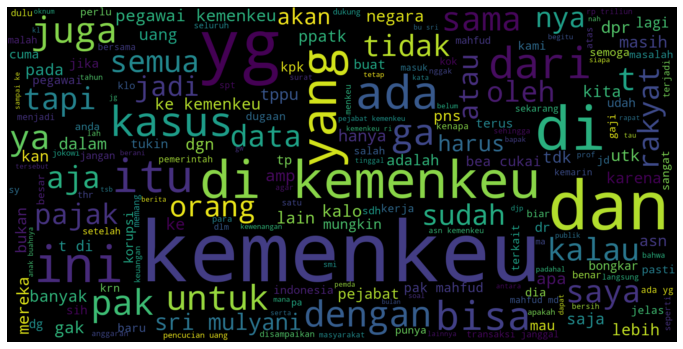

In [28]:
# Wordcloud for positif sentiment
positive = tweet_df[tweet_df['sentiment'] == 'Positif']
positive = positive['content'].str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(positive)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

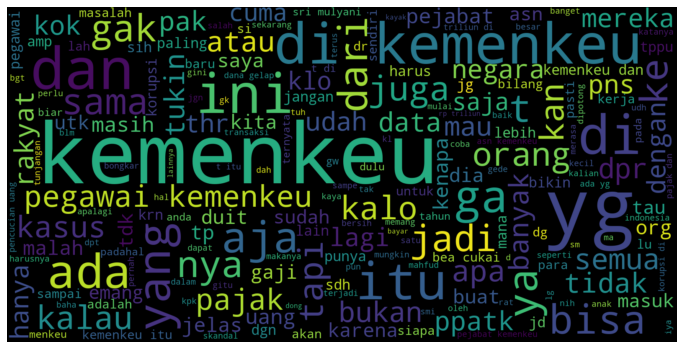

In [29]:
# Wordcloud for negatif sentiment
negative = tweet_df[tweet_df['sentiment'] == 'Negatif']
negative = negative['content'].str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(negative)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [30]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
print(tweet_df['stem'])
# w_features = get_word_features(get_words_in_tweets(tweet_df['stem']))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['containts(%s)' % word] = (word in document_words)
    return features


0                                                                                                                                       [tidak apa, orang, pegawai, kemenkeu, libat, trilyun, penjara, lapor]
1                                                                                                                                                          [umpama, mario, dandy, ulah, akan, kemenkeu, ubah]
2                                                         [kembang, opini, hebat, sri, mulyani, manfaat, pegawai, kemenkeu, nakal, rampok, uang, negara, bu, sri, nikmat, puji, tsb, lalai, awas, anak, buah]
3                                                                                                                                [persis, kayak, transaksi, ilegal, triliun, kemenkeu, maling, angkat, jabat]
4                                                                 [gak, kalah, sengsara, kerja, lembur, malam, kayak, tugas, pajak, biji, mata, sama, melotot, monitor, raya, ap

In [31]:
# Wordcloud for w_features
# wordcloud_draw(w_features)

In [32]:
# Most common positive word
from collections import Counter

positive = tweet_df[tweet_df['sentiment'] == 'Positif']
# positive["temp_list"] = positive.apply(lambda x:str(x).split())

top = Counter([item for sublist in positive['stem'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Greens')


,Common_words,count
0,kemenkeu,842
1,t,118
2,mahfud,95
3,uang,94
4,pajak,90
5,pegawai,86
6,data,85
7,ga,85
8,iya,84
9,orang,77


#### **3.4.3 Data Visualization**

In [33]:
# Pie Chart for Sentiments, Blue for Positif and Red for Negatif
fig = px.pie(tweet_df, names='sentiment', title ='Pie chart of different sentiments of tweets')
fig.show()

<Axes: title={'center': 'Sentiment Analysis'}>

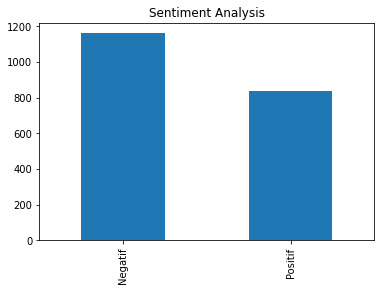

In [34]:
# Give me a chart for sentiment column
tweet_df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Analysis')

In [35]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

X = tweet_df['stem']

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(tweet_df['sentiment'])

print(X[0])
print(Y[0])

# Print unique value in Y
print(np.unique(Y))

['tidak apa', 'orang', 'pegawai', 'kemenkeu', 'libat', 'trilyun', 'penjara', 'lapor']
1
[0 1]


In [36]:
# Print size of positive and negative sentiment
print("Positive: ", len(tweet_df[tweet_df['sentiment'] == 'Positif']))
print("Negative: ", len(tweet_df[tweet_df['sentiment'] == 'Negatif']))

Positive:  840
Negative:  1162


## **4. Modelling**

### **4.1 With LSTM**

In [37]:
# Import Library
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Train Test Split
y = pd.get_dummies(tweet_df['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.10, random_state = 1)
print(X_train.shape,y_train.shape)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=1)
print(X_train.shape,y_train.shape)


(1601,) (1601,)
(1200,) (1200,)


In [38]:
vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

In [39]:
# print first 200 words/tokens
print(count_vector.get_feature_names()[0:200])

['', 'a', 'aamiin', 'abad', 'abang', 'abdi', 'abiisss', 'abissssslah', 'abiz', 'abrik', 'abur', 'acak', 'acara', 'accord', 'acem', 'achieve', 'achwong', 'acting', 'action', 'actionnya', 'ada', 'adil', 'adl', 'admin', 'administrasi', 'administratif', 'admn', 'adu', 'aduh', 'afiliasi', 'afmgm', 'agama', 'agan', 'agnes', 'agnesz', 'agregat', 'agung', 'ah', 'ahirahir', 'ahli', 'ahoker', 'aib', 'air', 'aja', 'ajah', 'ajakebenaran', 'ajang', 'ajar', 'ajib', 'aju', 'akademis', 'akal', 'akalin', 'akan', 'akar', 'akhir', 'akhirat', 'akhlak', 'akibat', 'akselerasi', 'akses', 'aksi', 'aktif', 'akting', 'aku', 'akumulasi', 'akun', 'akuntabel', 'akuntableblablaandap', 'akuntan', 'akurat', 'al', 'ala', 'alam', 'alamat', 'alami', 'alas', 'algojo', 'alhamdulillah', 'alhamdulillahbisa', 'ali', 'alias', 'alibi', 'alih', 'alir', 'allah', 'allahbagaimanapun', 'alloh', 'alm', 'alokasi', 'alpha', 'alright', 'alternatif', 'alumni', 'alun', 'alunini', 'alunjangan', 'alur', 'alusista', 'always', 'aman', 'amana

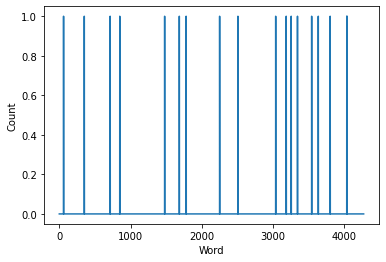

In [40]:
# Plot the BoW feature vector
plt.plot(X_train[2,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [41]:
# Tokenizing & Padding
def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

# Set the maximum number of words to be used
max_words = 5000

# Set the maximum length of each sequence (in words)
max_len = 100

print('Before Tokenization & Padding \n', tweet_df['stem'][0])
X, tokenizer = tokenize_pad_sequences(tweet_df['stem'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 ['tidak apa', 'orang', 'pegawai', 'kemenkeu', 'libat', 'trilyun', 'penjara', 'lapor']
After Tokenization & Padding 
 [696   6   5   1  34 178 487  35   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [42]:
# Train test split
y = pd.get_dummies(tweet_df['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (1200, 100) (1200, 2)
Validation Set -> (401, 100) (401, 2)
Test Set -> (401, 100) (401, 2)


In [43]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [44]:
# Import Library
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils import to_categorical
from keras.metrics import Precision, Recall

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_words, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy', Precision(), Recall()])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          640000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 2)                 394       
                                                                 
Total params: 895,194
Trainable params: 895,194
Non-trainable params: 0
_________________________________________________________________
None


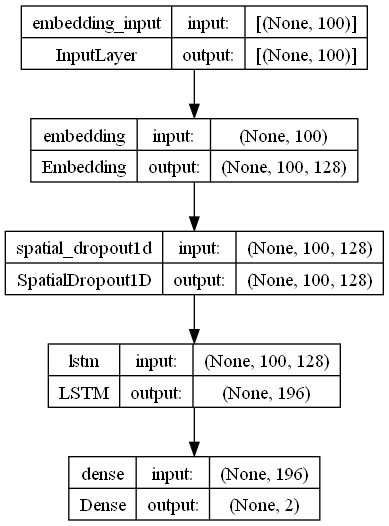

In [45]:
import tensorflow as tf

# Plot the model
tf.keras.utils.plot_model(model, show_shapes=True)

In [46]:
# Train the model
batch_size = 32
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val),
                    epochs = 20, 
                    batch_size=batch_size, 
                    verbose = 2)

Epoch 1/20
38/38 - 23s - loss: 0.6823 - accuracy: 0.5875 - precision: 0.5875 - recall: 0.5875 - val_loss: 0.6980 - val_accuracy: 0.5511 - val_precision: 0.5511 - val_recall: 0.5511 - 23s/epoch - 605ms/step
Epoch 2/20
38/38 - 13s - loss: 0.6799 - accuracy: 0.5875 - precision: 0.5875 - recall: 0.5875 - val_loss: 0.6910 - val_accuracy: 0.5511 - val_precision: 0.5511 - val_recall: 0.5511 - 13s/epoch - 345ms/step
Epoch 3/20
38/38 - 14s - loss: 0.6802 - accuracy: 0.5875 - precision: 0.5875 - recall: 0.5875 - val_loss: 0.6883 - val_accuracy: 0.5511 - val_precision: 0.5511 - val_recall: 0.5511 - 14s/epoch - 380ms/step
Epoch 4/20
38/38 - 14s - loss: 0.6795 - accuracy: 0.5875 - precision: 0.5875 - recall: 0.5875 - val_loss: 0.6883 - val_accuracy: 0.5511 - val_precision: 0.5511 - val_recall: 0.5511 - 14s/epoch - 371ms/step
Epoch 5/20
38/38 - 14s - loss: 0.6785 - accuracy: 0.5875 - precision: 0.5875 - recall: 0.5875 - val_loss: 0.6905 - val_accuracy: 0.5511 - val_precision: 0.5511 - val_recall: 0.

In [47]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=2, batch_size=batch_size)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))

13/13 - 2s - loss: 0.6774 - accuracy: 0.5885 - precision: 0.5885 - recall: 0.5885 - 2s/epoch - 128ms/step

Accuracy  : 0.5885
Precision : 0.5885
Recall    : 0.5885
F1 Score  : 0.5885


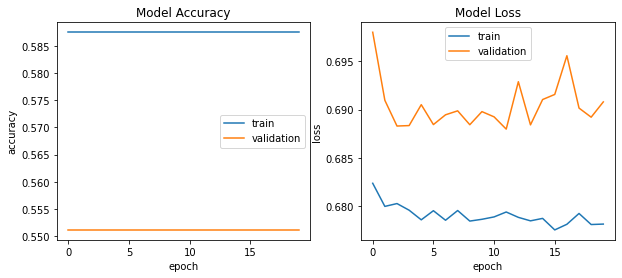

In [48]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

13/13 [==============================] - 2s 107ms/step


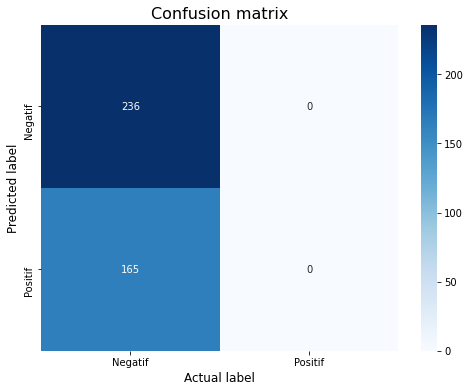

In [49]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negatif', 'Positif']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

#### **Save the best model**

In [50]:
# Save the model architecture & the weights
model.save('best_model.h5')
print('Best model saved')

Best model saved


In [51]:
twt = ['Meetings: Because none of us is as dumb as all of us.']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=28, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0  550 2748 2311 2584 2584 2790  550 2748]]
1/1 - 0s - 460ms/epoch - 460ms/step
negative


In [52]:
twt = ['Bad']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=28, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("The predicted sentiment is Negative")
elif (np.argmax(sentiment) == 1):
    print("The predicted sentiment is Positive")

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
1/1 - 0s - 48ms/epoch - 48ms/step
The predicted sentiment is Negative


In [57]:
twt = ['Bagus Dukung terus']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=28, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("The predicted sentiment is Negative")
elif (np.argmax(sentiment) == 1):
    print("The predicted sentiment is Positive")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0 366  49 741]]
1/1 - 0s - 214ms/epoch - 214ms/step
The predicted sentiment is Negative


In [ ]:
# from keras.models import load_model

# # Load model
# model = load_model('best_model.h5')

# def predict_class(text):
#     '''Function to predict sentiment class of the passed text'''
    
#     sentiment_classes = ['Negative', 'Positive']
#     max_len=50
    
#     #vectorizing the tweet by the pre-fitted tokenizer instance
#     xt = tokenizer.texts_to_sequences(text)
#     #padding the tweet to have exactly the same shape as `embedding_2` input
#     xt = pad_sequences(xt, maxlen=max_len, dtype='int32', value=0)
#     # print(twt)
#     sentiment = model.predict(xt,batch_size=1,verbose = 2)[0]
#     if(np.argmax(sentiment) == 0):
#         print("negative")
#     elif (np.argmax(sentiment) == 1):
#         print("positive")
#     # Print the predicted sentiment
#     print('The predicted sentiment is', sentiment_classes[sentiment[0]])
